# Assigment 4

In [98]:
#Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

For the last assignment, I choose two tables from "The State of the World's Children 2023: Statistical Tables" by UNICEF. The following link contains the two tables of the assignment and also more tables for public use:



https://data.unicef.org/resources/dataset/the-state-of-the-worlds-children-2023-statistical-tables/

Table 1: Demographic

In [58]:
df = pd.read_excel("assets/tbl1.xlsx")
df.head()

,TABLE 1. DEMOGRAPHICS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,Countries and areas,Population (thousands)\n2021,NaN,NaN,NaN,NaN,NaN,Annual population growth rate (%),NaN,NaN,...,NaN,NaN,Share of urban population (%)\n2021,NaN,Annual growth rate of urban population (%),NaN,NaN,NaN,"Net migration rate (per 1,000 population)\n2021",NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Old age dependency ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Total,NaN,Under 18,NaN,Under 5,NaN,2000–2020,NaN,2020–2030 (A),...,NaN,NaN,NaN,NaN,2000-2020,NaN,2020-2030 (A),NaN,NaN,NaN
3,Afghanistan,40099.462,NaN,20297.886,NaN,6490.554,NaN,3.286824,NaN,2.325169,...,4.438,NaN,26.314,NaN,4.070226,NaN,3.491593,NaN,-4.569,NaN
4,Albania,2854.71,NaN,574.3875,NaN,141.393,NaN,-0.496681,NaN,-0.248324,...,24.056,NaN,62.969,NaN,1.395963,NaN,0.771288,NaN,-3.71,NaN


Table 2: Child MORTALITY

In [87]:
df2 = pd.read_excel("assets/tbl2.xlsx")
df2.head()

,TABLE 2. CHILD MORTALITY,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,Countries and areas,Under-five mortality rate,NaN,NaN,NaN,NaN,NaN,Annual rate of reduction in under-five mortali...,NaN,Under-five mortality rate\n2021,...,Under-five deaths,NaN,Neonatal deaths,NaN,Neonatal deaths as a percentage of under-five ...,NaN,Deaths among children aged 5–14 years,NaN,Stillbirths,NaN
1,NaN,1990,NaN,2000,NaN,2021,NaN,2000-2021,NaN,Male,...,2021,NaN,2021,NaN,2021,NaN,2021,NaN,2021,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,178.450996,NaN,129.338891,NaN,55.657483,NaN,4,NaN,59.116979,...,77811,NaN,49061,NaN,63.051497,NaN,4396,NaN,37980,NaN
4,Albania,40.831704,NaN,27.181056,NaN,9.455919,NaN,5,NaN,10.159017,...,279,NaN,209,NaN,74.910394,NaN,59,NaN,128,NaN


### Research Question: What is the relationship between the mortality rate of children under 5 years of age in the 5 countries with the largest populations in the world?

In [60]:
#First, we have a lot of blank spaces, and in the two tables we have a lot of columns un useless

# Cleaning the first table: 

df1 = pd.DataFrame({'Country': df.iloc[:, 0], 'Pop U5': df.iloc[:, 5]})
#drop the first 3 rows and the last rows
df1 = df1.drop(index=df.index[:3])
df1 = df1.drop(index=df.index[205:])
df1



,Country,Pop U5
3,Afghanistan,6490.554
4,Albania,141.393
5,Algeria,4870.8425
6,Andorra,2.5385
7,Angola,5983.4065
...,...,...
200,Venezuela (Bolivarian Republic of),2395.9335
201,Viet Nam,7368.1565
202,Yemen,4714.0585
203,Zambia,3072.899


In [61]:
bad_values = df1.loc[df1['Pop U5'] == '-']

# Value for drop
print(bad_values)
df1['Pop U5'] = df1['Pop U5'].replace('-', np.nan)
df1 = df1.dropna(subset=['Pop U5'])

     Country Pop U5
80  Holy See      -


In [62]:
print(df1.info())
# Converting Pop U5 as float
df1['Pop U5'] = df1['Pop U5'].astype(float)

# Ordenar el DataFrame por la columna "Pop U5" de mayor a menor
df1 = df1.sort_values(by='Pop U5', ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 3 to 204
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  201 non-null    object 
 1   Pop U5   201 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB
None


<ipython-input-62-0260ffd32a45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Pop U5'] = df1['Pop U5'].astype(float)


Pop U5 is the Population (thousands)

In [93]:
df1.head()

,Country,Pop U5
84,India,115307.4255
40,China,74789.7005
133,Nigeria,34830.7985
138,Pakistan,29604.4785
85,Indonesia,22414.3165


In [88]:
# Cleaning the table 2
df2 = pd.DataFrame({'Country': df2.iloc[:, 0], 'mortality_rate': df2.iloc[:, 5]})
#drop the first 3 rows and the last rows
df2 = df2.drop(index=df2.index[:3])
df2 = df2.drop(index=df2.index[205:])




In [89]:
bad_values = df2.loc[df2['mortality_rate'] == '-']

# Value for drop
print(bad_values)
df2['mortality_rate'] = df2['mortality_rate'].replace('-', np.nan)
df2 = df2.dropna(subset=['mortality_rate'])
df2.info()

           Country mortality_rate
80        Holy See              -
105  Liechtenstein              -
183        Tokelau              -
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 3 to 207
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         200 non-null    object 
 1   mortality_rate  200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [91]:
df2 = df2.sort_values(by='mortality_rate', ascending=False)

In [94]:
df2.head()

,Country,mortality_rate
132,Niger,115.151880
168,Somalia,111.784553
133,Nigeria,110.819277
38,Chad,107.065477
163,Sierra Leone,104.686966


In [127]:
#merge the two df

df_combined = pd.merge(df1, df2, on='Country')

df_combined['Pop U5'] = df_combined['Pop U5'] / 1000

df_combined.head(10)

,Country,Pop U5,mortality_rate
0,India,115.307425,30.619213
1,China,74.789701,6.934592
2,Nigeria,34.830799,110.819277
3,Pakistan,29.604479,63.332552
4,Indonesia,22.414317,22.173413
5,United States,19.164415,6.242979
6,Ethiopia,17.797907,46.811467
7,Democratic Republic of the Congo,17.697937,78.960538
8,Bangladesh,14.663335,27.273630
9,Brazil,14.240614,14.410983


In [128]:
df_combined.describe()

,Pop U5,mortality_rate
count,199.000000,199.000000
mean,3.364631,25.647623
std,10.584629,26.769502
min,0.000144,1.717220
25%,0.115031,5.827553
50%,0.681633,14.598966
75%,2.992917,38.821578
max,115.307425,115.151880


Text(0.5, 1.0, 'Child population and mortality rate in the 10 most populous countries (2021)')

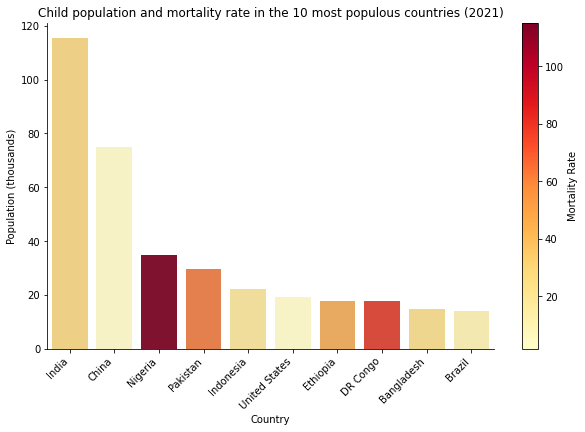

In [148]:
plt.figure(figsize=(10, 6))


min_ratio = df_combined['mortality_rate'].min()
max_ratio = df_combined['mortality_rate'].max()

color_map = plt.cm.get_cmap('YlOrRd')


# Graficar la población en barras
top_10_countries = df_combined.head(10)

sns.barplot(data=top_10_countries, x='Country', y='Pop U5', palette=color_map((top_10_countries['mortality_rate'] - min_ratio) / (max_ratio - min_ratio)))
plt.xticks(rotation=45, ha='right')

abbreviations = {'Democratic Republic of the Congo': 'DR Congo'}
plt.xticks(range(len(top_10_countries)), [abbreviations.get(label, label) for label in top_10_countries['Country']], rotation=45, ha='right')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Population (thousands)')

sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=min_ratio, vmax=max_ratio))
sm.set_array([])  # Ajustar un array vacío para evitar errores

cbar = plt.colorbar(sm)
cbar.set_label('Mortality Rate')

plt.title('Child population and mortality rate in the 10 most populous countries (2021)')